In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from scipy import stats, polyval
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 30
# plt.rcParams["font.weight"] = 'bold'
%matplotlib inline


In [90]:
s1 = pd.read_csv('nampo.csv',encoding = 'cp949')
s1['time']=pd.date_range(start='2015-1-1-00', end='2019-12-31-23', freq = 'H')
# s1=s1.dropna(axis=0) # 결측값 행 제거
# s1['PM2.5 Nampo']= s1['PM2.5 Nampo'].apply(pd.to_numeric, errors = 'coerce')

# s1= s1.astype(float)
# df['Gwang-bok'] = df['Gwang-bok'].apply(pd.to_numeric, errors='coerce')

s1


,year,month,day,hour,PM2.5 Nampo,PM10 Nampo,PM2.5 Gwangbok,PM10 Gwangbok,time
0,2015,1,1,0,15,25,11,19,2015-01-01 00:00:00
1,2015,1,1,1,17,38,9,21,2015-01-01 01:00:00
2,2015,1,1,2,16,20,8,19,2015-01-01 02:00:00
3,2015,1,1,3,10,17,7,22,2015-01-01 03:00:00
4,2015,1,1,4,4,11,10,26,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,12,19,12,16,2019-12-31 19:00:00
43820,2019,12,31,20,14,24,9,11,2019-12-31 20:00:00
43821,2019,12,31,21,12,13,10,7,2019-12-31 21:00:00
43822,2019,12,31,22,12,16,14,4,2019-12-31 22:00:00


In [91]:
def auto(df):
    df["Year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    df['PM2.5 Nampo'] = df['PM2.5 Nampo'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Nampo'] = df['PM10 Nampo'].apply(pd.to_numeric, errors='coerce')
    df['PM2.5 Gwangbok'] = df['PM2.5 Gwangbok'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Gwangbok'] = df['PM10 Gwangbok'].apply(pd.to_numeric, errors='coerce')

    df = df[['PM2.5 Nampo','PM10 Nampo','PM2.5 Gwangbok','PM10 Gwangbok','year']]
    df.set_index('year', inplace = True)
    
    return df

In [92]:
s1 = auto(s1)
s1

,PM2.5 Nampo,PM10 Nampo,PM2.5 Gwangbok,PM10 Gwangbok
year,,,,
2015,15.0,25.0,11.0,19.0
2015,17.0,38.0,9.0,21.0
2015,16.0,20.0,8.0,19.0
2015,10.0,17.0,7.0,22.0
2015,4.0,11.0,10.0,26.0
...,...,...,...,...
2019,12.0,19.0,12.0,16.0
2019,14.0,24.0,9.0,11.0
2019,12.0,13.0,10.0,7.0


#   1) Nampo vs 광복 (PM10, PM2.5)

Text(0.5, 0, 'Years')

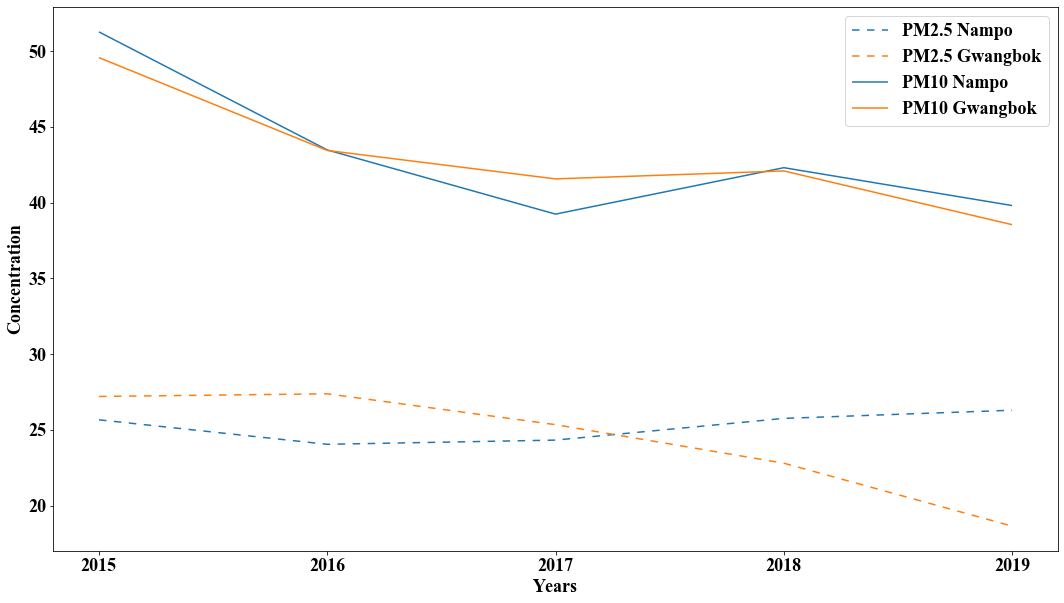

In [93]:
# pal = sns.dark_palette('purple',2)
plt.rcParams["font.size"] = 18
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=s1[['PM2.5 Nampo','PM2.5 Gwangbok']], dashes=[(5,5),(5,5)], ax = ax1, ci=None)
sns.lineplot(data=s1[['PM10 Nampo','PM10 Gwangbok']], dashes=[(10,0),(10,0)], ax = ax1,ci=None)
ax1.set_xticks([2015,2016,2017,2018,2019]) # x축 년도가 소수점으로 나와서 처리해줌
plt.ylabel('Concentration')
plt.xlabel('Years')
# plt.title('CO')

기울기(slope) = 0.70436
상관계수(correlation coefficient) = 0.60492
R squared = 0.37
기울기(slope) = 0.46714
상관계수(correlation coefficient) = 0.51242
R squared = 0.26


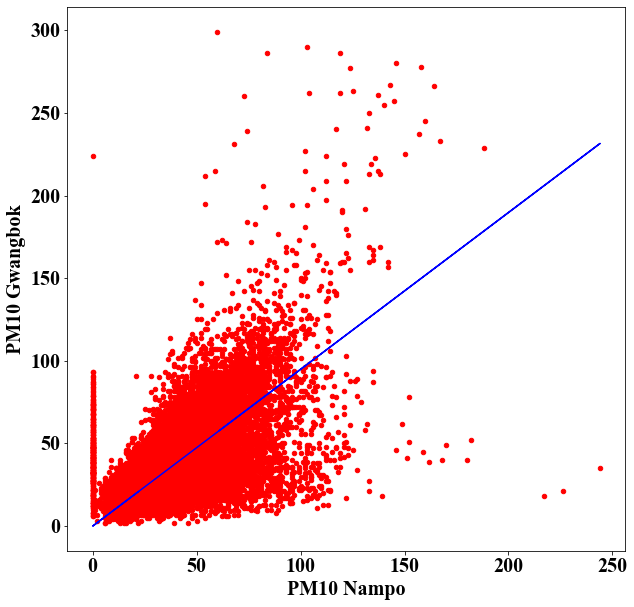

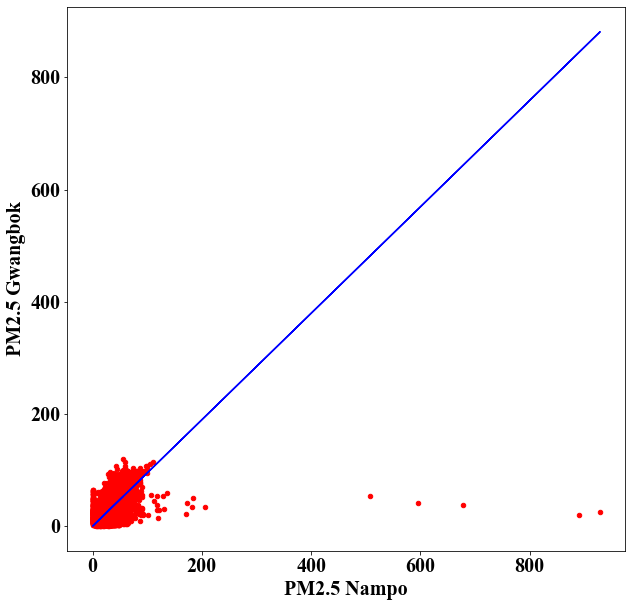

(0, 300)

In [95]:
# PM2.5 Nampo	PM10 Nampo	PM2.5 Gwangbok	PM10 Gwangbok
s1 = s1.drop(s1[s1['PM10 Gwangbok']> 300].index)
s1 = s1.drop(s1[s1['PM10 Nampo']> 300].index)
s1=s1.dropna(axis=0) # 결측값 행 제거

s1.shape

y=s1['PM10 Gwangbok']
x=s1['PM10 Nampo']

y2=s1['PM2.5 Gwangbok']
x2=s1['PM2.5 Nampo']

slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)
slope2, intercept2, r_value2, p_value2, stderr2 = stats.linregress(x2, y2)

print("기울기(slope) = {:3.5f}".format(slope))
print("상관계수(correlation coefficient) = {:3.5}" .format(r_value))
print('R squared = {:3.2f}' .format(r_value**2))


print("기울기(slope) = {:3.5f}".format(slope2))
print("상관계수(correlation coefficient) = {:3.5}" .format(r_value2))
print('R squared = {:3.2f}' .format(r_value2**2))

# 선형회귀식
linear_regression = linear_model.LinearRegression(fit_intercept=False)
linear_regression.fit(X=pd.DataFrame(x), y= y)
prediction = linear_regression.predict(X=pd.DataFrame(x))

linear_regression2 = linear_model.LinearRegression(fit_intercept=False)
linear_regression2.fit(X=pd.DataFrame(x2), y= y2)
prediction2 = linear_regression.predict(X=pd.DataFrame(x2))



plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)
ax = s1.plot(kind="scatter", x='PM10 Nampo', y='PM10 Gwangbok',color="red")
plt.plot(x,prediction,'b')
ax = s1.plot(kind="scatter", x='PM2.5 Nampo', y='PM2.5 Gwangbok',color="red")
plt.plot(x2,prediction2,'b')
plt.show()
# plt.rcParams["font.size"] = 20
# plt.rcParams["figure.figsize"] = (10,10)



ax.set_ylim(0,300)
ax.set_xlim(0,300)

#  2) Sasang vs 학장 (PM10, PM2.5)



In [69]:
s1 = pd.read_csv('hakjang.csv')
s1['time']=pd.date_range(start='2015-1-1-00', end='2019-12-31-23', freq = 'H')
s1

,year,month,day,hour,PM2.5 Sasang,PM10 Sasang,PM2.5 Hakjang,PM10 Hakjang,time
0,2015,1,1,0,9.0,19.0,16,16,2015-01-01 00:00:00
1,2015,1,1,1,5.0,18.0,18,18,2015-01-01 01:00:00
2,2015,1,1,2,13.0,34.0,32,19,2015-01-01 02:00:00
3,2015,1,1,3,17.0,22.0,12,17,2015-01-01 03:00:00
4,2015,1,1,4,7.0,22.0,14,27,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,16.0,43.0,11,17,2019-12-31 19:00:00
43820,2019,12,31,20,26.0,58.0,12,20,2019-12-31 20:00:00
43821,2019,12,31,21,14.0,0.0,9,13,2019-12-31 21:00:00
43822,2019,12,31,22,13.0,32.0,7,15,2019-12-31 22:00:00


In [70]:

def auto(df):
    df["Year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    df['PM2.5 Sasang'] = df['PM2.5 Sasang'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Sasang'] = df['PM10 Sasang'].apply(pd.to_numeric, errors='coerce')
    df['PM2.5 Hakjang'] = df['PM2.5 Hakjang'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Hakjang'] = df['PM10 Hakjang'].apply(pd.to_numeric, errors='coerce')

    df = df[['PM2.5 Sasang','PM10 Sasang','PM2.5 Hakjang','PM10 Hakjang','year']]
    df.set_index('year', inplace = True)
    
    return df
s1 = auto(s1)
s1

,PM2.5 Sasang,PM10 Sasang,PM2.5 Hakjang,PM10 Hakjang
year,,,,
2015,9.0,19.0,16.0,16.0
2015,5.0,18.0,18.0,18.0
2015,13.0,34.0,32.0,19.0
2015,17.0,22.0,12.0,17.0
2015,7.0,22.0,14.0,27.0
...,...,...,...,...
2019,16.0,43.0,11.0,17.0
2019,26.0,58.0,12.0,20.0
2019,14.0,0.0,9.0,13.0


Text(0.5, 0, 'Years')

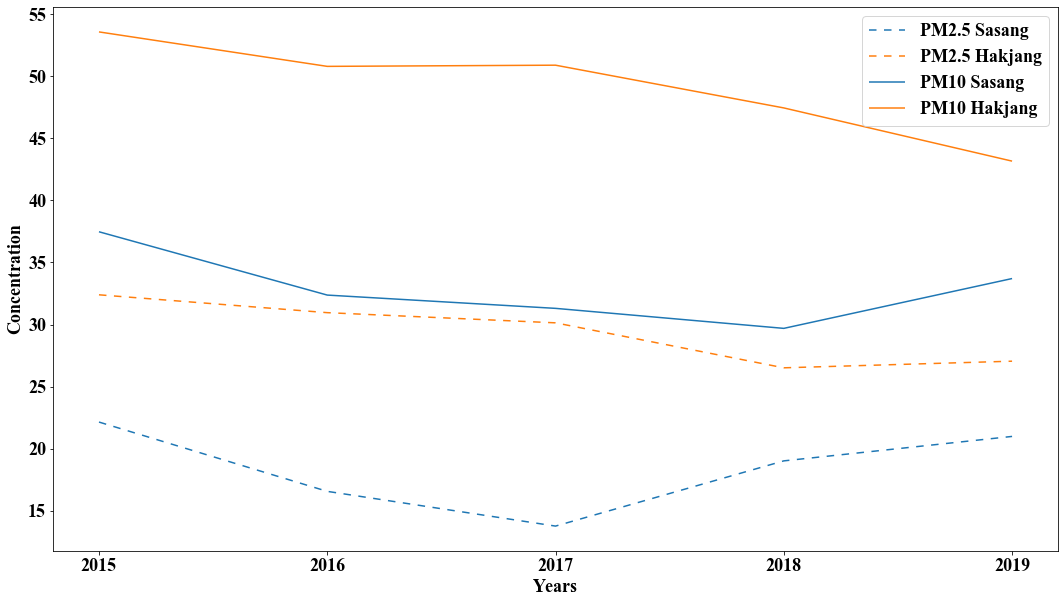

In [71]:

# pal = sns.dark_palette('purple',2)
plt.rcParams["font.size"] = 18
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=s1[['PM2.5 Sasang','PM2.5 Hakjang']], dashes=[(5,5),(5,5)], ax = ax1, ci=None)
sns.lineplot(data=s1[['PM10 Sasang','PM10 Hakjang']], dashes=[(10,0),(10,0)], ax = ax1,ci=None)
ax1.set_xticks([2015,2016,2017,2018,2019]) # x축 년도가 소수점으로 나와서 처리해줌
plt.ylabel('Concentration')
plt.xlabel('Years')
# plt.title('CO')

In [72]:
s1 = pd.read_csv('jeonpo.csv')
s1['time']=pd.date_range(start='2015-1-1-00', end='2019-12-31-23', freq = 'H')
s1

,year,month,day,hour,S-1-p PM2.5,S-1-p PM10,S-1-w PM2.5,S-1-w PM10,S-2-p PM2.5,S-2-p PM10,S-2-w PM2.5,S-2-w PM10,PM2.5 Jeonpo,PM10 Jeonpo,time
0,2015,1,1,0,12.0,41.0,22.0,40.0,9.0,30.0,21.0,26.0,11,34,2015-01-01 00:00:00
1,2015,1,1,1,13.0,36.0,25.0,31.0,9.0,28.0,13.0,25.0,9,25,2015-01-01 01:00:00
2,2015,1,1,2,21.0,50.0,29.0,56.0,9.0,30.0,19.0,44.0,8,32,2015-01-01 02:00:00
3,2015,1,1,3,6.0,22.0,11.0,29.0,6.0,27.0,16.0,26.0,7,41,2015-01-01 03:00:00
4,2015,1,1,4,6.0,22.0,14.0,20.0,8.0,29.0,9.0,18.0,10,43,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2019,12,31,19,16.0,24.0,20.0,50.0,6.0,20.0,5.0,29.0,12,9,2019-12-31 19:00:00
43820,2019,12,31,20,6.0,7.0,10.0,33.0,5.0,14.0,5.0,20.0,9,9,2019-12-31 20:00:00
43821,2019,12,31,21,12.0,33.0,15.0,36.0,4.0,12.0,8.0,21.0,10,13,2019-12-31 21:00:00
43822,2019,12,31,22,9.0,12.0,8.0,32.0,6.0,18.0,5.0,13.0,14,15,2019-12-31 22:00:00


In [73]:

def auto(df):
    df["Year"] = df["time"].dt.year
    df["time-month"] = df["time"].dt.month
    df["time-day"] = df["time"].dt.day
    df["time-hour"] = df["time"].dt.hour
    
    df['S-1-p PM2.5'] = df['S-1-p PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-1-p PM10'] = df['S-1-p PM10'].apply(pd.to_numeric, errors='coerce')
    
    df['S-1-w PM2.5'] = df['S-1-w PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-1-w PM10'] = df['S-1-w PM10'].apply(pd.to_numeric, errors='coerce')
    
    df['S-2-p PM2.5'] = df['S-2-p PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-2-p PM10'] = df['S-2-p PM10'].apply(pd.to_numeric, errors='coerce')

    df['S-2-w PM2.5'] = df['S-2-w PM2.5'].apply(pd.to_numeric, errors='coerce')
    df['S-2-w PM10'] = df['S-2-w PM10'].apply(pd.to_numeric, errors='coerce')
    
    df['PM2.5 Jeonpo'] = df['PM2.5 Jeonpo'].apply(pd.to_numeric, errors='coerce')
    df['PM10 Jeonpo'] = df['PM10 Jeonpo'].apply(pd.to_numeric, errors='coerce')
    
    
    df = df[['S-1-p PM2.5','S-1-p PM10','S-1-w PM2.5','S-1-w PM10','S-2-p PM2.5','S-2-p PM10','S-2-w PM2.5','S-2-w PM10','PM2.5 Jeonpo','PM10 Jeonpo','year']]
    df.set_index('year', inplace = True)
    
    return df
s1 = auto(s1)
s1

,S-1-p PM2.5,S-1-p PM10,S-1-w PM2.5,S-1-w PM10,S-2-p PM2.5,S-2-p PM10,S-2-w PM2.5,S-2-w PM10,PM2.5 Jeonpo,PM10 Jeonpo
year,,,,,,,,,,
2015,12.0,41.0,22.0,40.0,9.0,30.0,21.0,26.0,11.0,34.0
2015,13.0,36.0,25.0,31.0,9.0,28.0,13.0,25.0,9.0,25.0
2015,21.0,50.0,29.0,56.0,9.0,30.0,19.0,44.0,8.0,32.0
2015,6.0,22.0,11.0,29.0,6.0,27.0,16.0,26.0,7.0,41.0
2015,6.0,22.0,14.0,20.0,8.0,29.0,9.0,18.0,10.0,43.0
...,...,...,...,...,...,...,...,...,...,...
2019,16.0,24.0,20.0,50.0,6.0,20.0,5.0,29.0,12.0,9.0
2019,6.0,7.0,10.0,33.0,5.0,14.0,5.0,20.0,9.0,9.0
2019,12.0,33.0,15.0,36.0,4.0,12.0,8.0,21.0,10.0,13.0


#   3) S-1-p vs Jeonpo  (PM10, PM2.5)


Text(0.5, 0, 'Years')

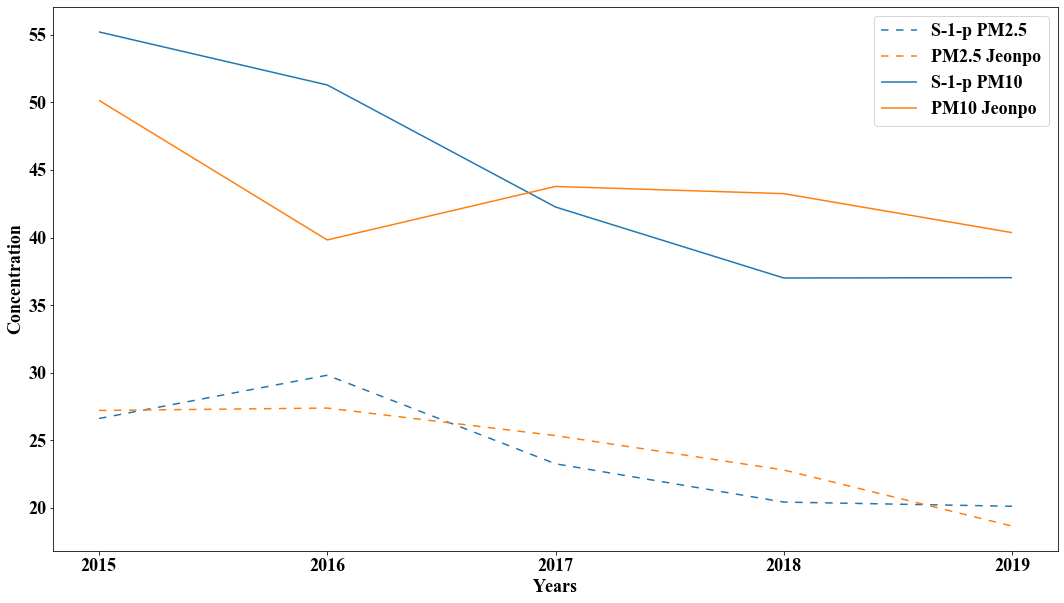

In [74]:

# pal = sns.dark_palette('purple',2)
plt.rcParams["font.size"] = 18
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=s1[['S-1-p PM2.5','PM2.5 Jeonpo']], dashes=[(5,5),(5,5)], ax = ax1, ci=None)
sns.lineplot(data=s1[['S-1-p PM10','PM10 Jeonpo']], dashes=[(10,0),(10,0)], ax = ax1,ci=None)
ax1.set_xticks([2015,2016,2017,2018,2019]) # x축 년도가 소수점으로 나와서 처리해줌
plt.ylabel('Concentration')
plt.xlabel('Years')
# plt.title('CO')

#   4) S-2-p vs Jeonpo  (PM10, PM2.5)

Text(0.5, 0, 'Years')

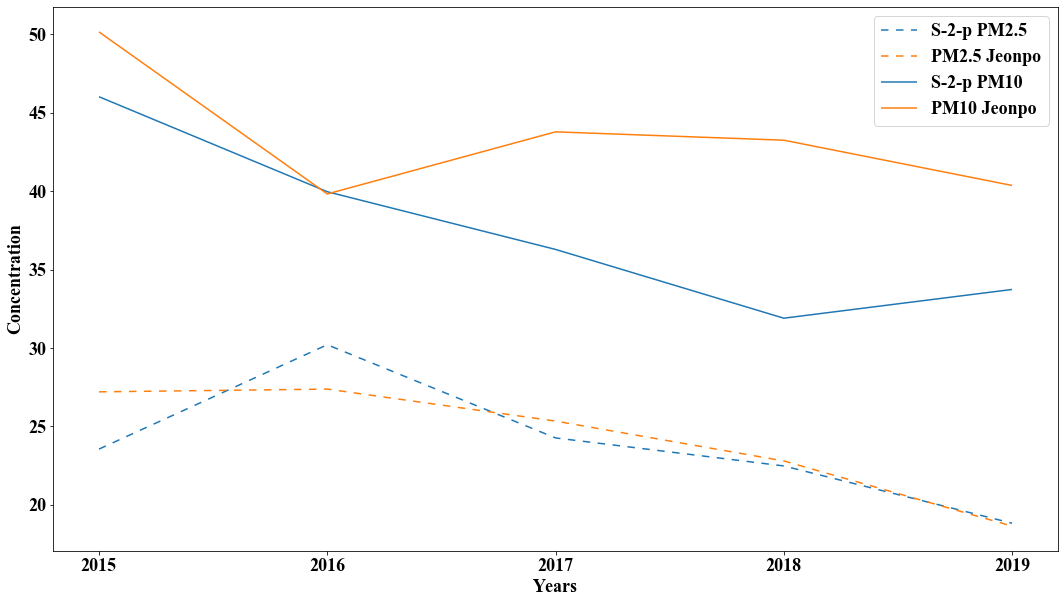

In [76]:

# pal = sns.dark_palette('purple',2)
plt.rcParams["font.size"] = 18
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=s1[['S-2-p PM2.5','PM2.5 Jeonpo']], dashes=[(5,5),(5,5)], ax = ax1, ci=None)
sns.lineplot(data=s1[['S-2-p PM10','PM10 Jeonpo']], dashes=[(10,0),(10,0)], ax = ax1,ci=None)
ax1.set_xticks([2015,2016,2017,2018,2019]) # x축 년도가 소수점으로 나와서 처리해줌
plt.ylabel('Concentration')
plt.xlabel('Years')
# plt.title('CO')

#   5) S-1-w vs Jeonpo  (PM10, PM2.5)


Text(0.5, 0, 'Years')

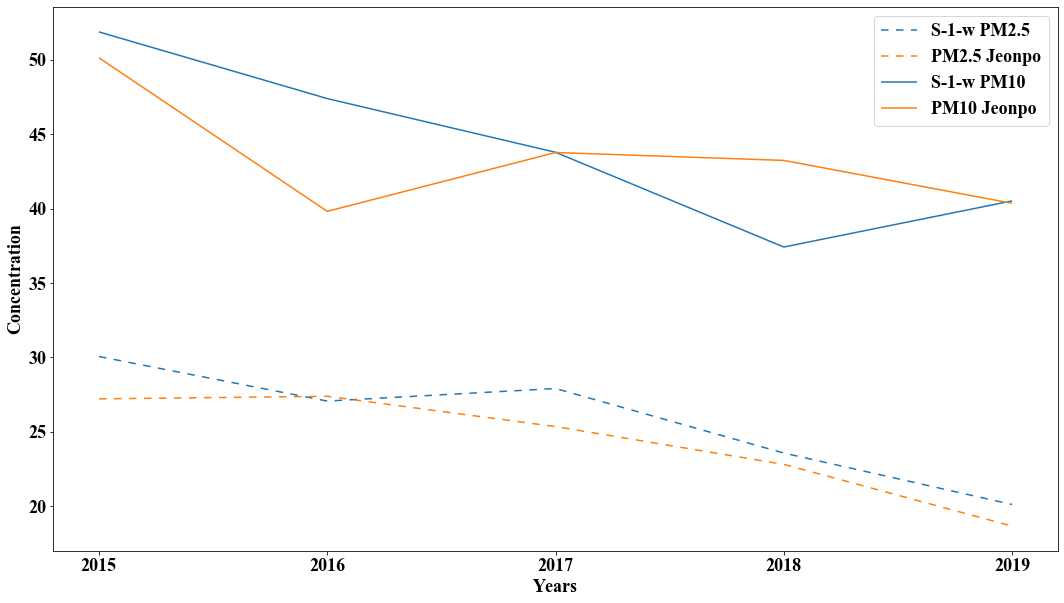

In [77]:

# pal = sns.dark_palette('purple',2)
plt.rcParams["font.size"] = 18
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=s1[['S-1-w PM2.5','PM2.5 Jeonpo']], dashes=[(5,5),(5,5)], ax = ax1, ci=None)
sns.lineplot(data=s1[['S-1-w PM10','PM10 Jeonpo']], dashes=[(10,0),(10,0)], ax = ax1,ci=None)
ax1.set_xticks([2015,2016,2017,2018,2019]) # x축 년도가 소수점으로 나와서 처리해줌
plt.ylabel('Concentration')
plt.xlabel('Years')
# plt.title('CO')

#   6) S-2-w vs Jeonpo  (PM10, PM2.5)


Text(0.5, 0, 'Years')

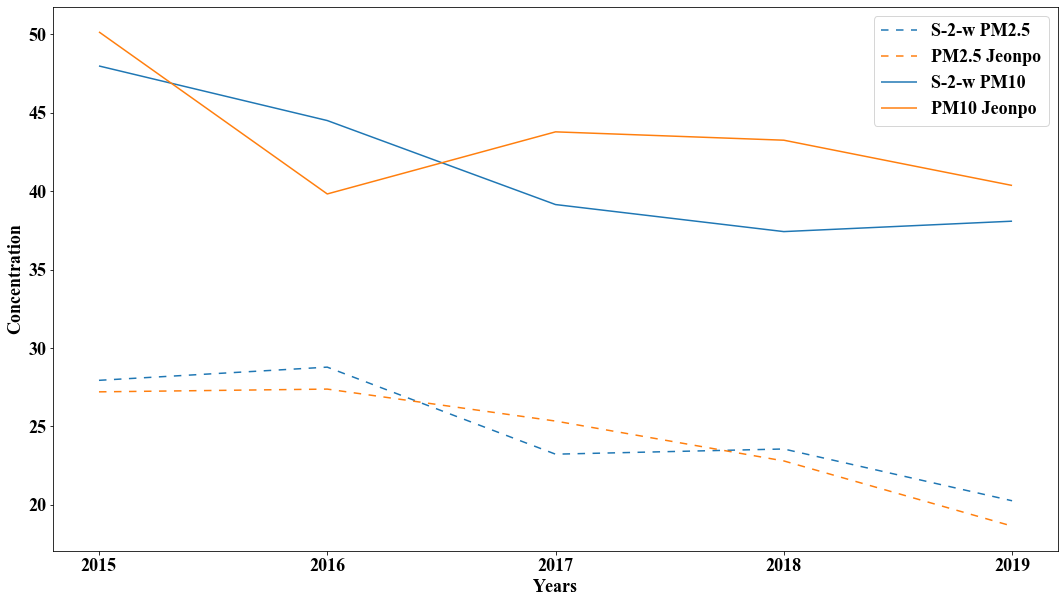

In [78]:

# pal = sns.dark_palette('purple',2)
plt.rcParams["font.size"] = 18
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,10)
sns.lineplot(data=s1[['S-2-w PM2.5','PM2.5 Jeonpo']], dashes=[(5,5),(5,5)], ax = ax1, ci=None)
sns.lineplot(data=s1[['S-2-w PM10','PM10 Jeonpo']], dashes=[(10,0),(10,0)], ax = ax1,ci=None)
ax1.set_xticks([2015,2016,2017,2018,2019]) # x축 년도가 소수점으로 나와서 처리해줌
plt.ylabel('Concentration')
plt.xlabel('Years')
# plt.title('CO')